# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Farras Surya Dio Putra
- **Email:** muhamadfarras48@gmail.com
- **ID Dicoding:** M001D4KY3368

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Jumlah Pengguna Bike Sharing di setiap bulannya?
- Pertanyaan 2: Bagaimana Jumlah Pengguna Bike Sharing di setiap musimnya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # for data wrangling
import matplotlib.pyplot as plt #for plotting charts
import seaborn as sns #for visualization and plotting

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [ ]:
#Menginput Data Bike Sharing
bikeSharing_df = pd.read_csv("https://raw.githubusercontent.com/farrasdp/bangkit2024/main/Introduce%20Python/hour.csv")
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
#Menilai Data Bike Sharing
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


terdapat kesalahan tipe data pada data Bike Sharing, diantaranya adalah
dteday seharusnya tipe date time. Kemudian
season, yr, mnth, hr, holiday, weekday, workingday, weathersit seharusnya tipe kategorik

In [ ]:
#Mengecek Missing Value
bikeSharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada Data Bike Sharing

In [ ]:
#Memeriksa Duplikasi Data
print("Jumlah duplikasi: ", bikeSharing_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data pada Data Bike Sharing

In [ ]:
#Memeriksa parameter statistik
bikeSharing_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari semua tahapan, terlihat bahwa datanya tidak ada kendala

### Cleaning Data

In [ ]:
#Menghilangkan duplicate data
bikeSharing_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", bikeSharing_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Mengatasi missing value
bikeSharing_df.dropna(axis=0, inplace=True)

In [ ]:
#Mengubah Tipe Data pada dteday
datetime_columns = ["dteday"]

for column in datetime_columns:
  bikeSharing_df[column] = pd.to_datetime(bikeSharing_df[column])

#Mengubah Tipe Data
category_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

for column in category_columns:
  bikeSharing_df[column] = bikeSharing_df[column].astype('category')

In [ ]:
#Mengecek Kembali
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [ ]:
#Eksplorasi Data
bikeSharing_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [ ]:
#Melihat demografi pengguna berdasarkan musim (season)
bikeSharing_df.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"]
})

casual                registered                
              max min       mean        max min        mean
weathersit                                                 
1             367   0  40.545431        886   0  164.323841
2             350   0  29.595290        822   0  145.570202
3             263   0  16.055673        791   0   95.523608
4               6   1   2.666667        158  22   71.666667

nilai maks pada casual (pengguna biasa) terdapat pada musim 1 yaitu sebanyak 267 pengguna. sedangkan nilai maks pada registered (pengguna terdaftar) terdapat pada musim 1 juga sebanyak 886

In [ ]:
#Melihat persebaran jumlah pengguna berdasarkan musim
bikeSharing_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

Dapat dilihat bahwa persebaran pengguna pada musim 1 (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian) memiliki jumlah pengguna paling banyak dibanding dengan yang lain. musim 4 (Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut) memiliki jumlah pengguna paling sedikit

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1:

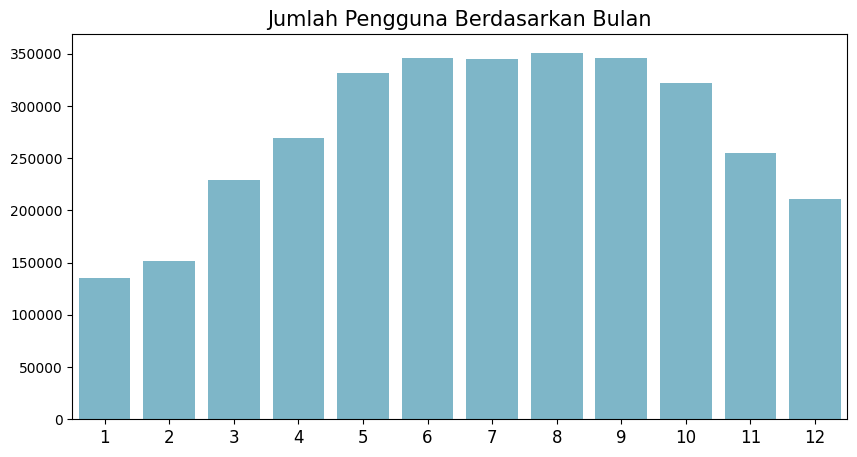

In [ ]:
byweathersit_df = bikeSharing_df.groupby(by="mnth").cnt.sum().reset_index()
byweathersit_df.rename(columns={
    "cnt": "cnt_sum"
}, inplace=True)

plt.figure(figsize=(10, 5))

colors = ["#72BCD4"]
sns.barplot(
    y="cnt_sum",
    x="mnth",
    data=byweathersit_df.sort_values(by="cnt_sum", ascending=False),
    palette=colors
)
plt.title("Jumlah Pengguna Berdasarkan Bulan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

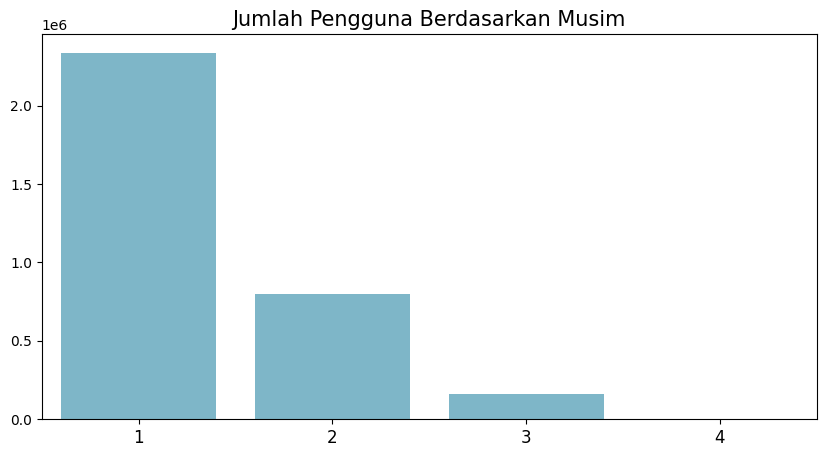

In [ ]:
byweathersit_df = bikeSharing_df.groupby(by="weathersit").cnt.sum().reset_index()
byweathersit_df.rename(columns={
    "cnt": "cnt_sum"
}, inplace=True)

plt.figure(figsize=(10, 5))

colors = ["#72BCD4"]
sns.barplot(
    y="cnt_sum",
    x="weathersit",
    data=byweathersit_df.sort_values(by="cnt_sum", ascending=False),
    palette=colors
)
plt.title("Jumlah Pengguna Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1
Jadi, bisa dilihat bahwa sebaran pengguna bike sharing dari naik dari bulan januari ke bulan Juni, kemudian mengalami penurunan dari bulan Agustus ke bulan Desember. Bulan Agustus merupakan bulan dengan jumlah pengguna paling banyak. sedangkan bulan Januari merupakan bulan dengan Jumlah Pengguna paling sedikit.
- Conclution pertanyaan 2
Jadi, bisa dilihat bahwa pengguna menggunakan bike sharing kebanyakan hampir saat musim 1, yaitu ketika keadaan Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian. Sedangkan pengguna jarang bahkan tidak banyak yang menggunakan bike sharing ketika dalam musim 4 yaitu dalam keadaan Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut karena bisa membahayakan diri.